## <center><span style=color:green>EDA-4. СТАТИСТИЧЕСКИЕ ТЕСТЫ (HW-03)

In [68]:
# Установка используемых библиотек
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest

import warnings
warnings.simplefilter('ignore') # отключение warnings

### <center>1. Объединение двух массивов в DataFrame

In [69]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
df = pd.DataFrame({'petersburg': pd.Series(petersburg), 
                     'magadan': pd.Series(magadan)})
df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


Так как размеры выборок для разных городам не совпадают, то можно вставить вместо недостающего значения среднюю величину размера раковины.

In [70]:
#создаем словарь для замены пропуска
# {имя столбца: средняя величина раковины}
values = {'petersburg': round(df['petersburg'].mean(), 4)}

#заполняем пропуск в соответствии с заявленным словарем
df = df.fillna(values)
df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1034,0.0689


Оценим данные визуально: построим гистограммы распределения значений для каждого города

array([[<AxesSubplot: title={'center': 'petersburg'}>,
        <AxesSubplot: title={'center': 'magadan'}>]], dtype=object)

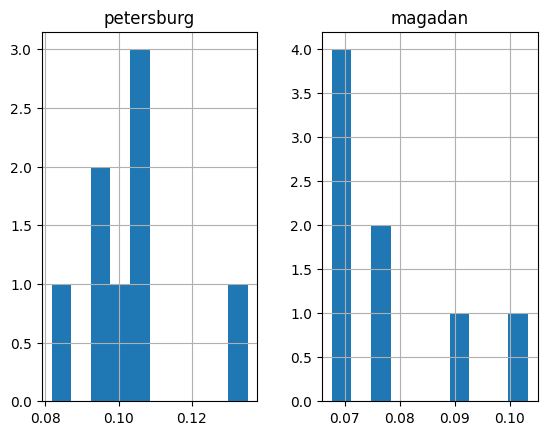

In [71]:
df.hist()

Визуально график для размера ракушек из petersburg похож на распределение Гаусса, а для города magadan - нет. Далее, проверим данные выборки на нормальность другими методами. 

### <center>2. Выбор теста на корреляцию

Прежде чем выбрать тест на корреляцию сначала нужно понять, какому распределению эти данные следуют. Для количественной оценки того, выглядит ли выборка данных так, как если бы она была взята из **распределения Гаусса** используем два теста на нормальность: 

* тест Шапиро-Уилка;
* тест Д’Агостино $K^{2}$

In [72]:
H0 = 'Мы не можем отвергнуть нулевую гипотезу. Распределение нормально'
Ha = 'Мы отвергаем нулевую гипотезу. Распределение ненормально'
alpha = 0.05

In [73]:
_, p = shapiro(df.petersburg)
print('p=%.3f' % p)

# Интерпретация
if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.123
Мы не можем отвергнуть нулевую гипотезу. Распределение нормально


In [74]:
_, p = shapiro(df.magadan)
print('p=%.3f' % p)

# Интерпретация
if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.036
Мы отвергаем нулевую гипотезу. Распределение ненормально


In [75]:
_, p = normaltest(df)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 
if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.042
Мы не можем отвергнуть нулевую гипотезу. Распределение нормально


Для количественных данных с нормальным распределением используются Параметрические тесты (наиболее распространённые - **корреляционные** и **сравнительные**).

Корреляционные тесты проверяют, связаны ли переменные, не выдвигая гипотезы о причинно-следственной связи. Наиболее распространённым является **параметрический тест на корреляцию Пирсона**.

In [76]:
from scipy.stats import pearsonr
corr, p = pearsonr(df.petersburg, df.magadan)
print(f'Корреляция: {round(corr, 3)}\nP-value: {round(p, 3)}')

Корреляция: 0.245
P-value: 0.559


In [77]:
cor = df.corr()
print(round(cor, 3))

            petersburg  magadan
petersburg       1.000    0.245
magadan          0.245    1.000


Зависимая переменная (размер раковины) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

**Независимый T-тест** проверяет разницу между одной и той же переменной из разных совокупностей (petersburg и magadan). *Стоит отметить, что T-тест используется на выборках размером меньше 30*.